# Viscous Nutation Damper

In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
w1,w2,w3,w1d,w2d,w3d,D,O,Od,I1,Iw,Is,It,M1,M2 = \
symbols('omega_1,omega_2,omega_3,omegadot_1,omegadot_2,\
omegadot_3,D,Omega,Omegadot,I_1,I_W,I_S,I_T,M1,M2')
diffmap = {w1:w1d,w2:w2d,w3:w3d,O:Od}

![Nutation Damper](img/nutation_damper.png)

Define total and wheel MOI in $\mathcal B$ frame (about respective centers of mass):

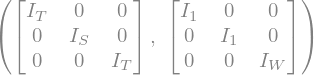

In [2]:
Isat_B = diag(It,Is,It)
Iwheel_B = diag(I1,I1,Iw)
Isat_B,Iwheel_B

Define ${}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B}$ and ${}^\mathcal{B}\boldsymbol{\omega}^\mathcal{A}$ where $\mathcal A$ is the frame fixed to the wheel ($\mathbf b_3 \equiv \mathbf a_3$):

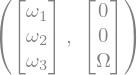

In [3]:
iWb = Matrix([w1,w2,w3])
bWa = Matrix([0,0,O])
iWb,bWa

Calculate total angular momentum:

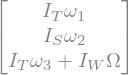

In [4]:
hG_sat = Isat_B*iWb + Iwheel_B*bWa
hG_sat

Angular momentum of the wheel:

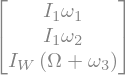

In [5]:
hG_wheel = Iwheel_B*(bWa+iWb); hG_wheel

Set up and solve systems of differential equations assuming no external torques and $-D\Omega$ torque internal torque about the wheel spin axis:

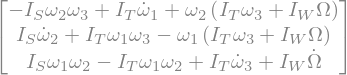

In [6]:
eq1 = difftotalmat(hG_sat,t,diffmap) + skew(iWb)*hG_sat;eq1

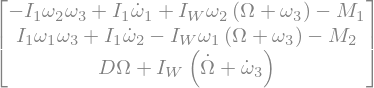

In [7]:
eq2 = difftotalmat(hG_wheel,t,diffmap) + skew(iWb)*hG_wheel - Matrix([M1,M2,-D*O]);eq2

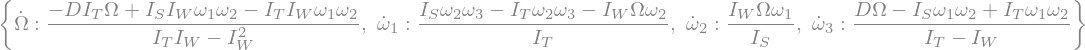

In [8]:
sol1 = simplify(solve((eq1,eq2[2]),(w1d,w2d,w3d,Od)))
sol1

Finally, some numerical integration:

In [9]:
import numpy, scipy
import scipy.integrate
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Integrator state is: $z = \begin{bmatrix} \omega_1, \omega_2,\omega_3, \Omega \end{bmatrix}^T$. Note that there are common factors of $I_S/I_T$, $I_W/I_T$, and $D/I_T$.  Grouping:

In [10]:
IsIt,IwIt, IwIs,DIt = symbols('\\frac{I_S}{I_T},\\frac{I_W}{I_T},\\frac{I_W}{I_S},\\frac{D}{I_T}')

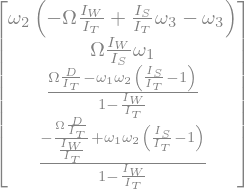

In [11]:
dz = Matrix([simplify(expand(sol1[w1d]).subs(Is/It,IsIt).subs(Iw/It,IwIt)),
             simplify(expand(sol1[w2d]).subs(Iw/Is,IwIs)),
             (DIt*O - (IsIt - 1)*w1*w2)/(1 - IwIt),
             ((IsIt - 1)*w1*w2 - DIt/IwIt*O)/(1 - IwIt)])
dz

In [12]:
simplify(sol1[w3d] - (D/It*O - (Is/It - 1)*w1*w2)/(1 - Iw/It))

In [13]:
simplify(((Is/It - 1)*w1*w2 - D/It/(Iw/It)*O)/(1 - Iw/It) - sol1[Od])

Pick some numerical values and initial conditions:

In [14]:
IsItn = 1.5
#IsItn = 1/1.5
IwItn = 0.06
IwIsn = IwItn/IsItn
DItn = 0.5

z0n = [0.2, 2, 0, 0]; #rad/s

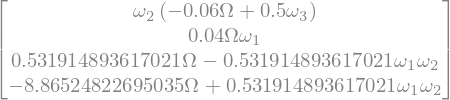

In [15]:
dz1 = dz.subs(([IsIt,IsItn],[IwIt,IwItn],[IwIs,IwIsn],[DIt,DItn]))
dz1

In [16]:
f1 = lambdify((w1,w2,w3,O),dz1)
f2 = lambda z,t: f1(z[0],z[1],z[2],z[3]).flatten()

In [17]:
t = numpy.linspace(0,400,1000)
y = scipy.integrate.odeint(f2,z0n,t)

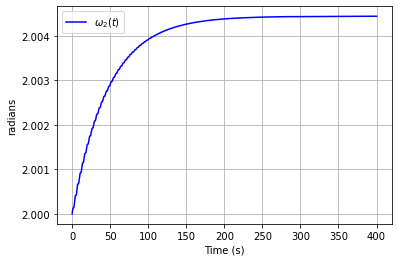

In [18]:
plt.plot(t, y[:, 1], 'b', label='$\\omega_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('radians')
plt.grid()

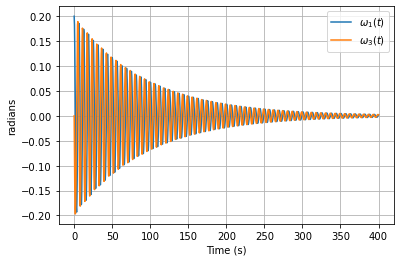

In [19]:
plt.plot(t, y[:, 0], label='$\\omega_1(t)$')
plt.plot(t, y[:, 2], label='$\\omega_3(t)$')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('radians')
plt.grid()

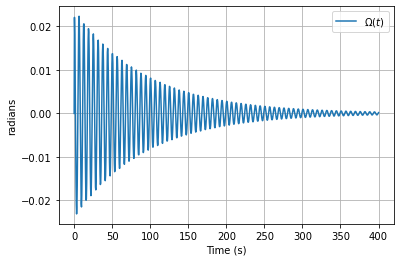

In [20]:
plt.plot(t, y[:, 3], label='$\\Omega(t)$')
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('radians')
plt.grid()